In [1]:
from multi_nutrient_model import ref_parameters, perturbation_dynamics, \
    perturbation_steady_state, I0,  PARAMETER_NAMES, PARAMETER_DESCRIPTIONS, steady_state
import numpy as np


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator


# Set font size and style in matplotlib
plt.rcParams.update({'font.size': 12, 'font.family': 'Arial'})

# Error bar kwargs for prism style plots
errorbar_kwargs = {'capsize': 2, 'capthick': 1, 'elinewidth': 1, 'zorder': 10}

# Spine properties
spine_properties = {'color': 'black', 'linewidth': 2}

# TODO Better colors for this figure

# Color palate with basal, default, and perturbation colors
colors_basal = ['whitesmoke','lightsteelblue', 'steelblue']

# Color palate for the K/P models
colors_AIRKO = ['grey', 'lightcoral']
colors_MIRKO = ['grey', 'steelblue']


In [3]:
# Scaling 

# ATP per O2 (3 per O)
PO2 = 5.0
# Whole body oxygen consumption rate ~ 2000 nmol/min/gBW
vO2 = 2000 * 0.7 
# ATP production rate
vATP = PO2 * vO2 
# Scale the oxygen fluxes by vE
vE = vATP 


In [4]:
K_i_ketogenesis = 0.2 # Assumption 
p_fited = ref_parameters( K_i_ketogenesis = K_i_ketogenesis )

VARIABLE_NAME = ['L', 'G', 'F', 'K', 'I', 'IA']


In [5]:
# Glucose tolerance test - Wildtype 
time = np.linspace(0, 15, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_fited, R_glucose = 0.06 )[0]
time = np.linspace(15, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, R_glucose =0 )[0]

pertubation_G_wt = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_wt['G'] = pertubation_G_wt['G'] * 7
pertubation_G_wt['F'] = pertubation_G_wt['F'] * 0.5
pertubation_G_wt['K'] = pertubation_G_wt['K'] * 0.5
pertubation_G_wt['L'] = pertubation_G_wt['L'] * 0.7
pertubation_G_wt['I'] = pertubation_G_wt['I'] / I0 * 0.4


In [6]:
# Glucose tolerance test - Adipose insulin receptor K/O 
p_ADIRKO = p_fited.copy()
p_ADIRKO[PARAMETER_NAMES.index('insulin_action_lipolysis')] = False
X0 = steady_state(1,p_ADIRKO)

ADIRKO_X0 = X0.copy()

time = np.linspace(0, 15, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_ADIRKO, X0 = ADIRKO_X0, R_glucose = 0.06 )[0]
time = np.linspace(15, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_ADIRKO, R_glucose = 0.0)[0]

pertubation_G_AIRKO = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_AIRKO['G'] = pertubation_G_AIRKO['G'] * 7
pertubation_G_AIRKO['F'] = pertubation_G_AIRKO['F'] * 0.5
pertubation_G_AIRKO['K'] = pertubation_G_AIRKO['K'] * 0.5
pertubation_G_AIRKO['L'] = pertubation_G_AIRKO['L'] * 0.7
pertubation_G_AIRKO['I'] = pertubation_G_AIRKO['I'] / I0 * 0.4



In [7]:
# Glucose tolerance test - Wildtype (MIRKO control) 
time = np.linspace(0, 15, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_fited, R_glucose = 0.06 )[0]
time = np.linspace(15, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, R_glucose = 0.0)[0]

pertubation_G_wt1 = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_wt1['G'] = pertubation_G_wt1['G'] * 7
pertubation_G_wt1['F'] = pertubation_G_wt1['F'] * 0.5
pertubation_G_wt1['K'] = pertubation_G_wt1['K'] * 0.5
pertubation_G_wt1['L'] = pertubation_G_wt1['L'] * 0.7
pertubation_G_wt1['I'] = pertubation_G_wt1['I'] / I0 * 0.4


In [8]:
# Glucose tolerance test -  Muscle insulin receptor K/O
p_MIRKO = p_fited.copy()
p_MIRKO[PARAMETER_NAMES.index('insulin_action_glycolysis')] = False
X0 = steady_state(1,p_MIRKO)

MIRKO_X0 = X0.copy()

time = np.linspace(0, 15, 100)
pertubation_G_1 = perturbation_dynamics(time,1.0, p=p_MIRKO, R_glucose = 0.06 )[0]
time = np.linspace(15, 120, 100)
x0 = pertubation_G_1.iloc[-1][VARIABLE_NAME].values
pertubation_G_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_MIRKO, R_glucose = 0.0)[0]

pertubation_G_MIRKO = pd.concat([pertubation_G_1, pertubation_G_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_G_MIRKO['G'] = pertubation_G_MIRKO['G'] * 7 
pertubation_G_MIRKO['F'] = pertubation_G_MIRKO['F'] * 0.5
pertubation_G_MIRKO['K'] = pertubation_G_MIRKO['K'] * 0.5
pertubation_G_MIRKO['L'] = pertubation_G_MIRKO['L'] * 0.7
pertubation_G_MIRKO['I'] = pertubation_G_MIRKO['I'] / I0 * 0.4



In [9]:
# Insulin tolerance test -  Wildtype 
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(1, 120, 100)
x0=[1.0,1.0,1.0,1.0, I0 * 75, I0 ]
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I['G'] = pertubation_I['G'] * 7
pertubation_I['F'] = pertubation_I['F'] * 0.5
pertubation_I['K'] = pertubation_I['K'] * 0.5
pertubation_I['L'] = pertubation_I['L'] * 0.7
pertubation_I['I'] = pertubation_I['I'] / I0 * 0.4



In [10]:
# Insulin tolerance test -  Wildtype 
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(1, 120, 100)
x0=steady_state(1,p_fited)
x0[-2] = I0 * 20
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I['G'] = pertubation_I['G'] * 7
pertubation_I['F'] = pertubation_I['F'] * 0.5
pertubation_I['K'] = pertubation_I['K'] * 0.5
pertubation_I['L'] = pertubation_I['L'] * 0.7
pertubation_I['I'] = pertubation_I['I'] / I0 * 0.4



In [11]:
# Insulin tolerance test -  WT
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(1, 120, 100)
x0=steady_state(1,p_fited)
x0[-2] = I0 * 60
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I_wt = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_wt['G'] = pertubation_I_wt['G'] * 7
pertubation_I_wt['F'] = pertubation_I_wt['F'] * 0.5
pertubation_I_wt['K'] = pertubation_I_wt['K'] * 0.5
pertubation_I_wt['L'] = pertubation_I_wt['L'] * 0.7
pertubation_I_wt['I'] = pertubation_I_wt['I'] / I0 * 0.4



In [12]:
# Insulin tolerance test -  Adipose insulin receptor KO 
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, X0=ADIRKO_X0, p=p_ADIRKO,)[0]

time = np.linspace(1, 120, 100)
x0=steady_state(1, p_ADIRKO)
x0[-2] = I0 * 60
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_ADIRKO, )[0]

pertubation_I_ADIRKO = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_ADIRKO['G'] = pertubation_I_ADIRKO['G'] * 7
pertubation_I_ADIRKO['F'] = pertubation_I_ADIRKO['F'] * 0.5
pertubation_I_ADIRKO['K'] = pertubation_I_ADIRKO['K'] * 0.5
pertubation_I_ADIRKO['L'] = pertubation_I_ADIRKO['L'] * 0.7
pertubation_I_ADIRKO['I'] = pertubation_I_ADIRKO['I'] / I0 * 0.4


In [13]:
# Insulin tolerance test -  WT
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, p=p_fited,)[0]

time = np.linspace(1, 100, 100)
x0=steady_state(1,p_fited)
x0[-2] = I0 * 60
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_fited, )[0]

pertubation_I_wt2 = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_wt2['G'] = pertubation_I_wt2['G'] * 7
pertubation_I_wt2['F'] = pertubation_I_wt2['F'] * 0.5
pertubation_I_wt2['K'] = pertubation_I_wt2['K'] * 0.5
pertubation_I_wt2['L'] = pertubation_I_wt2['L'] * 0.7
pertubation_I_wt2['I'] = pertubation_I_wt2['I'] / I0 * 0.4


In [14]:
# Insulin tolerance test -  Muscle insulin receptor KO 
time = np.linspace(0, 1, 100)
pertubation_I_1 = perturbation_dynamics(time,1.0, X0=MIRKO_X0, p=p_MIRKO,)[0]

time = np.linspace(1, 100, 100)
x0=steady_state(1,p_MIRKO)
x0[-2] = I0 * 60
pertubation_I_2 = perturbation_dynamics(time,1.0, X0=x0, p=p_MIRKO, )[0]

pertubation_I_MIRKO = pd.concat([pertubation_I_1, pertubation_I_2], axis=0).reset_index()

# Scale concentration by mouse reference
pertubation_I_MIRKO['G'] = pertubation_I_MIRKO['G'] * 7
pertubation_I_MIRKO['F'] = pertubation_I_MIRKO['F'] * 0.5
pertubation_I_MIRKO['K'] = pertubation_I_MIRKO['K'] * 0.5
pertubation_I_MIRKO['L'] = pertubation_I_MIRKO['L'] * 0.7
pertubation_I_MIRKO['I'] = pertubation_I_MIRKO['I'] / I0 * 0.4



#Plot GTT and ITT in absolute units

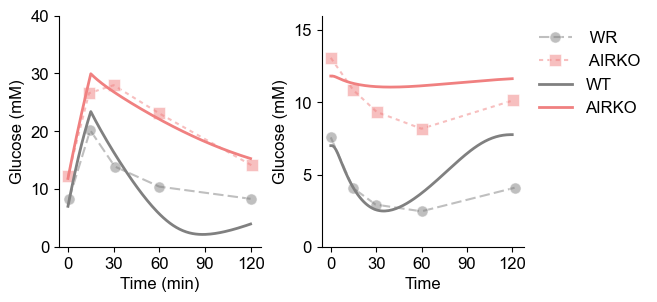

In [15]:
# Figure pannel for Adipose insulin receptor knockout
f, ax = plt.subplots(1,2, figsize=(6,3), )
plt.subplots_adjust( wspace=0.3)

# Barplot of Glucose in WT and 
# Data from 2017 Rob. Kahn Cell Metabolism paperd
Glucose= [ 136.29629629629562, 235.50264550264487]
Glucose_SEM = [147.31922398588995 - 136.29629629629562, 256.170634920634 -  235.50264550264487]

# Scale glucose and glucose SEM to mM 
Glucose = [ g / 18 for g in Glucose]
Glucose_SEM = [ g / 18 for g in Glucose_SEM]

# Time plot - for GTT 

GTT_data = pd.read_csv('./data/GTT_AIRKO_2017.csv')

GTT_data['Glucose'] = GTT_data['Glucose'] / 18 # Convert to mM

sns.lineplot(GTT_data, x='Time', y='Glucose', hue='Genotype', style='Genotype',
            ax =ax[0], palette=colors_AIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5,
            legend=False
            )

ax[0].plot( pertubation_G_wt['time'],pertubation_G_wt['G'], color=colors_AIRKO[0], label='WT', linewidth=2)
ax[0].plot( pertubation_G_AIRKO['time'],pertubation_G_AIRKO['G'], color=colors_AIRKO[1], label='AIRKO', linewidth=2)
ax[0].set_ylim(0,40)
ax[0].set_xticks([0,30,60,90,120])
ax[0].set_ylabel('Glucose (mM)')
ax[0].set_xlabel('Time (min)')



# Time plot for ITT
ITT_data = pd.read_csv('./data/ITT_AIRKO_2017.csv')
ITT_data['Glucose_fraction'] = 100 - ITT_data['Glucose']
# Scale WR with Glucose[0] and AIRKO with Glucose[1]    
ITT_data['Glucose_mM'] = ITT_data.apply(lambda row: row['Glucose_fraction']/100 * Glucose[0]  
                                     if 'WR' in row['Genotype'] else row['Glucose_fraction'] / 100 * Glucose[1] , axis=1)

sns.lineplot(ITT_data, x='Time', y='Glucose_mM', hue='Genotype', style='Genotype',
            ax =ax[1], palette=colors_AIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5
            )

ax[1].plot( pertubation_I_wt['time'],pertubation_I_wt['G'],  color=colors_AIRKO[0], label='WT', linewidth=2)
ax[1].plot( pertubation_I_ADIRKO['time'],pertubation_I_ADIRKO['G'], color=colors_AIRKO[1], label='AIRKO', linewidth=2)
ax[1].set_ylim(0,16)
ax[1].set_xticks([0,30,60,90,120])
ax[1].set_ylabel('Glucose (mM)')
ax[1].legend( frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

plt.savefig('output/validation_AIRKO_G_I_GTT_ITT.svg',  bbox_inches='tight')

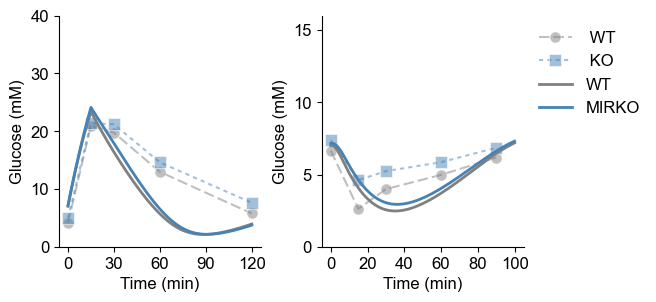

In [16]:
# Figure panel for Muscle insulin receptor knockout - GTT and ITT side by side
f, ax = plt.subplots(1,2, figsize=(6,3))
plt.subplots_adjust(wspace=0.3)

# Barplot of Glucose in WT 
Glucose= [ 120.49382716049381, 133.66255144032922]
Glucose_SEM = [125.10288065843622 - 120.49382716049381, 
               140.90534979423867 -  133.66255144032922]

# Scale glucose and glucose SEM to mM 
Glucose = [ g / 18 for g in Glucose]
Glucose_SEM = [ g / 18 for g in Glucose_SEM]

# Time plot - for GTT 
GTT_data = pd.read_csv('./data/GTT_MIRKO_2010.csv')
GTT_data['Glucose'] = GTT_data['Glucose'] / 18 # Convert to mM




sns.lineplot(GTT_data, x='Time', y='Glucose', hue='Genotype', style='Genotype',
            ax=ax[0], palette=colors_MIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5,
            legend=False)

ax[0].plot(pertubation_G_wt1['time'], pertubation_G_wt1['G'], 
           color=colors_MIRKO[0], label='WT', linewidth=2)
ax[0].plot(pertubation_G_MIRKO['time'], pertubation_G_MIRKO['G'],
           color=colors_MIRKO[1], label='MIRKO', linewidth=2)
ax[0].set_ylim(0,40)
ax[0].set_xticks([0,30,60,90,120])
ax[0].set_ylabel('Glucose (mM)')
ax[0].set_xlabel('Time (min)')

# Time plot for ITT
ITT_data = pd.read_csv('./data/ITT_MIRKO_2010.csv')
ITT_data['Glucose_fraction'] = ITT_data['Glucose']
# Scale WT with Glucose[0] and MIRKO with Glucose[1]    
ITT_data['Glucose_mM'] = ITT_data.apply(lambda row: row['Glucose_fraction']/100 * Glucose[0]  
                                     if 'WT' in row['Genotype'] else row['Glucose_fraction'] / 100 * Glucose[1], axis=1)

sns.lineplot(ITT_data, x='Time', y='Glucose_mM', hue='Genotype', style='Genotype',
            ax=ax[1], palette=colors_MIRKO, marker='o', markersize=8, 
            dashes=[(5,2),(2,2)], markers=['o','s'], alpha=0.5)

ax[1].plot(pertubation_I_wt2['time'], pertubation_I_wt2['G'],
           color=colors_MIRKO[0], label='WT', linewidth=2)
ax[1].plot(pertubation_I_MIRKO['time'], pertubation_I_MIRKO['G'], 
           color=colors_MIRKO[1], label='MIRKO', linewidth=2)
ax[1].set_ylim(0,16)
ax[1].set_xticks([0,20,40,60,80,100])
ax[1].set_ylabel('Glucose (mM)')
ax[1].set_xlabel('Time (min)')
ax[1].legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1))

sns.despine()

plt.savefig('output/validation_MIRKO_GTT_ITT_side_by_side.svg', bbox_inches='tight')
plt.show()